# Traccia:

In [0]:
import pandas as pd
import numpy as np

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

1. Caricare il dataset "winemag-data_first150k.csv" all'interno di un DataFrame pandas


In [4]:
df = pd.read_csv("winemag-data_first150k.csv", sep=',')
df.head(3)

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [5]:
df.shape

(150930, 11)

In [11]:
len(df)

150930

In [6]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

2. Visualizzare tramite un bar plot le 10 province dalle quali si producono più vini (ovvero con un conteggio di vini maggiore). Cosa si evince dal grafico?

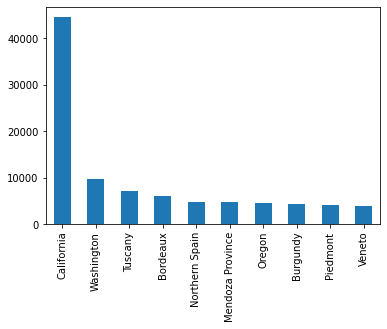

In [9]:
s = df['province'].value_counts()
s = s.iloc[:10]
s.plot.bar()

3. Visualizzare tramite un bar plot le 10 province dalle quali si producono più vini. Visualizzare questa volta dati percentuali. Cosa si evince dal grafico?

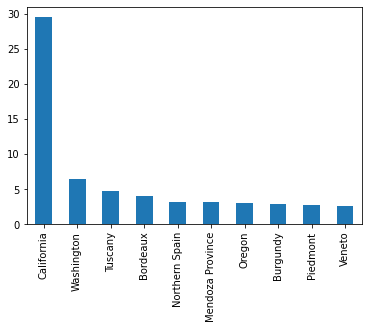

In [14]:
s = df['province'].value_counts()
s = s.iloc[:10] 
s = (s / len(df)) * 100
s.plot.bar()

4. Visualizzare tramite un bar plot il conteggio dei voti (colonna points) assegnati alle varie recensioni. Qual è il voto che è stato assegnato al maggior numero di recensioni?

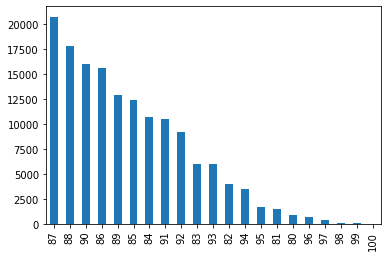

In [17]:
s = df['points'].value_counts()
s.plot.bar()

5. Modificare il grafico precedente in modo da visualizzare i voti in senso crescente.

In [18]:
s

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

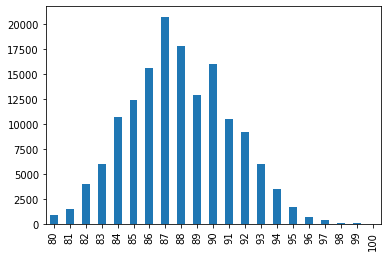

In [21]:
s = s.sort_index()
s.plot.bar()

6. Visualizzare la stessa informazione del grafico del punto 8 con un grafico a linea

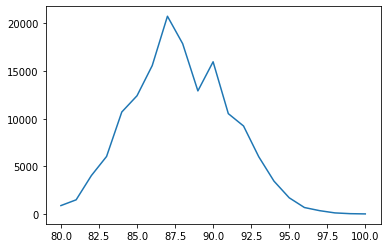

In [22]:
s.plot()

7. Visualizzare con un istogramma la frequenza dei voti assegnati nelle varie recensioni.  Visualizzare il grafico anche con seaborn.

In [23]:
df['points'].head(4)

0    96
1    96
2    96
3    96
Name: points, dtype: int64

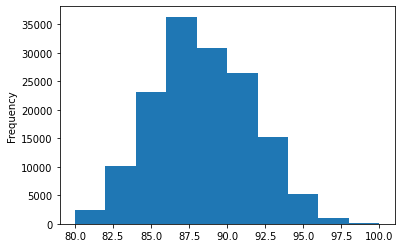

In [25]:
df['points'].plot.hist(bins=10)

8. Visualizzare con un istogramma la frequenza del prezzo dei vini.

In [26]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

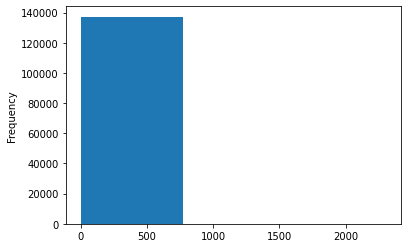

In [31]:
df['price'].plot.hist(bins=3)

In [0]:
df[df['price'] > 900]

9. Visualizzare con un istogramma la frequenza del prezzo dei vini che costano meno di 200 dollari.

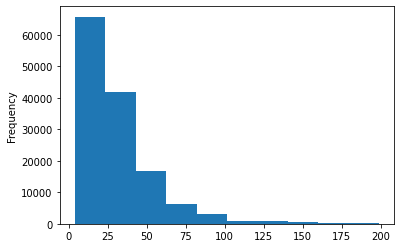

In [34]:
df[df['price'] < 200]['price'].plot.hist()

10. Visualizzare con uno scatter plot la relazione che sussiste tra voti assegnati nelle recensioni e prezzo del vino. Selezionare un sample di 100 elementi. Cosa è possibile notare? Visualizzare il grafico anche con seaborn.

In [36]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

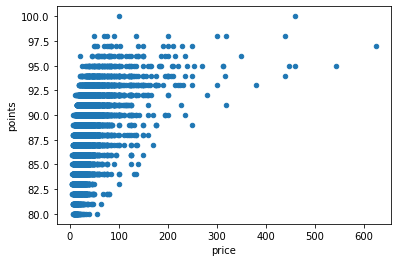

In [62]:
dfnew = df.sample(10000)
dfnew.plot.scatter(x='price', y='points')

In [59]:
dfnew['price'].min()

8.0

In [60]:
dfnew['price'].max()

215.0

11. Selezionare le sole recensioni che si riferiscono alle seguenti varietà di vini: "Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend". Raggruppare i vini per voto e varietà e conteggiarli (usare un group by). Visualizzare questa informazione con un bar plot stacked.

In [39]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

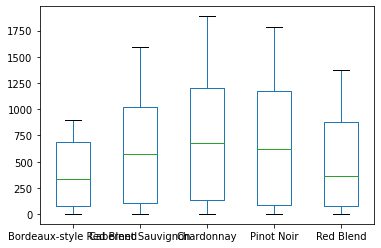

In [63]:
vini = ["Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend"]

dfnew = df[df['variety'].isin(vini)].groupby(['points', 'variety']).size().unstack()
dfnew.plot.box()

In [64]:
dfnew

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,89.0,70.0,36.0,75.0
81,23.0,160.0,154.0,86.0,108.0
82,83.0,436.0,523.0,296.0,233.0
83,122.0,571.0,686.0,350.0,366.0
84,334.0,925.0,1170.0,757.0,623.0
85,379.0,1058.0,1299.0,903.0,608.0
86,467.0,1205.0,1525.0,1260.0,919.0
87,679.0,1589.0,1887.0,1784.0,1375.0
88,741.0,1160.0,1513.0,1586.0,1366.0


In [0]:
dfnew.fillna(0, inplace=True)

12. Visualizzare l'informazione precedente con un plot area ed un line chart.

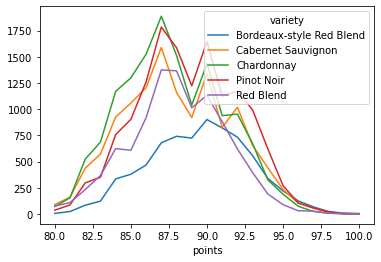

In [66]:
dfnew.plot()

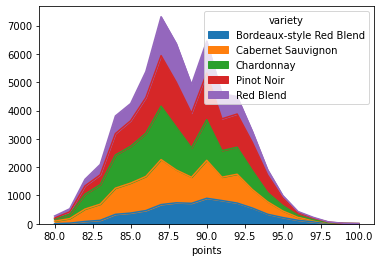

In [67]:
dfnew.plot.area()

13. Visualizzare con un box plot (con seaborn) la distribuzione dei voti per le 5 varietà di vini "Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend".

In [50]:
vini

['Bordeaux-style Red Blend',
 'Cabernet Sauvignon',
 'Chardonnay',
 'Pinot Noir',
 'Red Blend']

In [0]:
dfnew = df[df['variety'].isin(vini)]
dfnew

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f4874bba8>]],
      dtype=object)

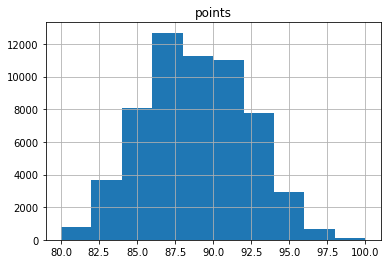

In [57]:
dfnew[['variety', 'points']].hist()

14. Visualizzare con seaborn un istogramma relativo alla frequenza di voti per ognuna delle 5 varietà di vini precedenti. Utilizzare FacetGrid.

15. Visualizzare con pairplot seaborn una comparison tra il prezzo dei vini e i voti associati. Selezionare un sample di 100 elementi e rimuovere prima i valori nulli.

16. Visualizzare in un heatmap seaborn la correlazione tra il prezzo dei vini e i voti associati.